# Data Preparation 

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()
# What you can see here, there is some inconsitency 
# in the way of naming columns
# -> sometimes the columns have underscores, sometimes not, 
#      sometimes the columns have capital letters, sometimes not
# 
# df['Transmission Type']     is working 
# df.Transmission Type        is not working because of space

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Cleaning
To make the columns more consistent we might decide to make them all lowercased and we might replace spaces with underscores. The following code snippets show how to get this

In [4]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [5]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Actually we have the same problems with the values. Before we can apply that, we need to detect all string columns, because the str function works only on strings.

In [6]:
# dtypes returns for all the columns what is the type of this 
# column and here we're interested in "objects"
#
# In case of csv files "objects" cannot be something 
# different than strings
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [7]:
df.dtypes == 'object'
 
# to select only the objects
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

The output of the last line of code in the last snippet are the values and the index of the series. We’re not interested in values here, but we’re interested in the names.

In [8]:
# Get access to the index of that series 
# Converting it to a python list with name strings
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [9]:
df['make'].str.lower().str.replace(' ','_')
 
# Better way
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')
 
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# Exploratory data analysis (EDA) 
Exploratory data analysis (EDA) is an essential step in the data analysis process. It involves summarizing and visualizing the main characteristics of a dataset to gain insights and identify patterns or trends. By exploring the data, researchers can uncover hidden relationships between variables and make informed decisions.

One common technique in EDA is to calculate summary statistics like mean, median, and standard deviation to understand the distribution of the data. These statistics provide a general overview of the dataset and can help identify potential outliers or unusual patterns.

Visualizations also play a crucial role in EDA. Graphical representations such as histograms, scatter plots, and box plots help visualize the data distribution, identify clusters or groups, and detect any unusual patterns or trends. Visualizations can be particularly helpful in identifying relationships between variables or finding patterns that may not be immediately apparent.

Another important aspect of EDA is data cleaning. This involves handling missing values, outliers, and inconsistencies in the dataset. By carefully examining the data, researchers can decide how to handle missing values (e.g., imputing or removing them) and identify and address outliers or errors.

EDA is not a one-time process but rather an iterative one. As researchers delve deeper into the data, they may uncover additional questions or areas of interest that require further exploration. Through this iterative process, researchers refine their understanding of the data and uncover valuable insights.

In conclusion, exploratory data analysis is a crucial step in the data analysis process. By summarizing, visualizing, and cleaning the data, researchers can uncover patterns, identify relationships, and make informed decisions. It provides the foundation for more advanced data analysis techniques and helps in the formation of hypotheses for further investigation.

## Getting an overview
First we want to understand how the data looks like just to get a feeling what values are there. That helps to learn more about the problem. What you can do is to look at each column and print some values.

In [10]:
for col in df.columns:
    print(col)
    print(df[col].head())
    print()

make
0    bmw
1    bmw
2    bmw
3    bmw
4    bmw
Name: make, dtype: object

model
0    1_series_m
1      1_series
2      1_series
3      1_series
4      1_series
Name: model, dtype: object

year
0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

engine_fuel_type
0    premium_unleaded_(required)
1    premium_unleaded_(required)
2    premium_unleaded_(required)
3    premium_unleaded_(required)
4    premium_unleaded_(required)
Name: engine_fuel_type, dtype: object

engine_hp
0    335.0
1    300.0
2    300.0
3    230.0
4    230.0
Name: engine_hp, dtype: float64

engine_cylinders
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: engine_cylinders, dtype: float64

transmission_type
0    manual
1    manual
2    manual
3    manual
4    manual
Name: transmission_type, dtype: object

driven_wheels
0    rear_wheel_drive
1    rear_wheel_drive
2    rear_wheel_drive
3    rear_wheel_drive
4    rear_wheel_drive
Name: driven_wheels, dtype: object

number_of_doors
0    2.0
1   

In [11]:
for col in df.columns:
    print(col)
    # print only the first 5 values
    print(df[col].unique()[:5])
    # print(df[col].unique())
    print("number of unique values: ",df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
number of unique values:  48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
number of unique values:  914

year
[2011 2012 2013 1992 1993]
number of unique values:  28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
number of unique values:  10

engine_hp
[335. 300. 230. 320. 172.]
number of unique values:  356

engine_cylinders
[ 6.  4.  5.  8. 12.]
number of unique values:  9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
number of unique values:  5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
number of unique values:  4

number_of_doors
[ 2.  4.  3. nan]
number of unique values:  3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
number of unique values:  71

## Distribution of price
Next we want to look at the price and visualize this column.

In [12]:
# For plotting we use two libraries
 
import matplotlib.pyplot as plt
import seaborn as sns
 
# this line is needed to display the plots in notebooks
%matplotlib inline
 
# bins = number of bars in the histogram
# in the diagram 1e6 means 10^6 = 1,000,000
sns.histplot(df.msrp, bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

What you can see in the histogram, there are a lot of prices that are pretty cheap but only a few cars that are very expensive. That means this is a long-tail distribution (many prices in a small range, but a few prices in a wide range). We need to zoom in a bit to “ignore” the long tail with too less datapoints.

In [13]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

This kind of distribution (long tail, and the peak) is not good for ML models, because this distribution will confuse them.There is a way to get rid of the long tail, by applying logarithm to the price. This results in more compact values.

In [14]:
np.log([0, 1,10,1000,100000])

/var/folders/1f/tbkzr71d44bg087cj88tj6_w0000gn/T/ipykernel_2172/911933570.py:1: RuntimeWarning: divide by zero encountered in log
  np.log([0, 1,10,1000,100000])


array([       -inf,  0.        ,  2.30258509,  6.90775528, 11.51292546])

In [15]:
# problem with logarithm is when we have a 0, because log(0) does not exist
np.log([0 + 1, 1 + 1, 10 + 1, 1000 + 1, 100000 + 1])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [16]:
# to not always add 1 there is a NumPy function
np.log1p([0, 1,10,1000,100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [17]:
price_logs = np.log1p(df.msrp)
sns.histplot(price_logs, bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

You can see the long tail is gone and you see a nice bell curve shape of a so called normal distribution, what is ideal for ML models. But still there is the strange peak. This could be the minimum price of $1,000 of the platform.

## Missing values
As the title suggests, this is about finding missing values (NaN values). We can use the function in the following snippet to find that values. The sum function sums across columns and shows for each column how much missing values are there. This information is important when training a model.

In [18]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# Setting up the validation framework
To validate the model, we take the dataset and split it into three parts (train-val-test / 60-20-20). The reason why this is useful was mentioned in an earlier blog post. This means that we train the model on the training dataset, check if it works fine on the validation dataset, and leave the test dataset for the end. We only use the test dataset very occasionally, and only to check if the model is performing well. For each of these three parts, we create the feature matrix X and the target variable y (Xtrain, ytrain, Xval, yval, Xtest, ytest). So, what we need to do is calculate how much 20% is.

In [19]:
len(df)

11914

In [20]:
int(len(df) * 0.2)

2382

In [21]:
n = len(df)
n_val = n_test = int(n * 0.2)
n_train = n - n_val - n_test
n , n_val+n_test+n_train

(11914, 11914)

In [22]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [23]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train + n_val]
df_test = df.iloc[n_train + n_val:]

You might think that this concludes the division, but there is one crucial problem. This approach brings us to the problem that it’s sequential. That’s a problem when there is an order in the dataset. That means we need to shuffle, otherwise, there are BMWs only in one dataset. Generally shuffling is always a good idea.

In [24]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [25]:
# to make it reproducible
#np.random.seed(2)
np.random.shuffle(idx)
idx

array([1470, 2320, 6650, ...,  705, 8797, 1123])

In [26]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [27]:
# Create shuffled datasets with correct size
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
1470,ford,aspire,1995,regular_unleaded,63.0,4.0,manual,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,38,31,5657,2000
2320,chevrolet,captiva_sport,2013,flex-fuel_(unleaded/e85),180.0,4.0,automatic,front_wheel_drive,4.0,"crossover,flex_fuel",midsize,4dr_suv,28,20,1385,25770
6650,chevrolet,malibu_classic,2008,regular_unleaded,219.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,29,18,1385,20320
11749,nissan,xterra,2013,regular_unleaded,261.0,6.0,automatic,four_wheel_drive,4.0,NaN,midsize,4dr_suv,20,15,2009,24990
3674,mercedes-benz,e-class,2015,premium_unleaded_(required),402.0,8.0,automatic,rear_wheel_drive,2.0,"luxury,high-performance",midsize,convertible,26,17,617,67750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,chevrolet,corvette,2016,premium_unleaded_(recommended),460.0,8.0,manual,rear_wheel_drive,2.0,high-performance,compact,coupe,29,17,1385,64855
8468,buick,rendezvous,2006,regular_unleaded,195.0,6.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,21,16,155,27780
9285,gmc,sierra_1500_classic,2007,flex-fuel_(unleaded/e85),295.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,17,13,549,33755
7129,mazda,mx-6,1995,regular_unleaded,118.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,31,23,586,2000


In [28]:
# Now there is no order in the index column so we can reset index and drop the old index column.
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [29]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,ford,aspire,1995,regular_unleaded,63.0,4.0,manual,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,38,31,5657,2000
1,chevrolet,captiva_sport,2013,flex-fuel_(unleaded/e85),180.0,4.0,automatic,front_wheel_drive,4.0,"crossover,flex_fuel",midsize,4dr_suv,28,20,1385,25770
2,chevrolet,malibu_classic,2008,regular_unleaded,219.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,29,18,1385,20320
3,nissan,xterra,2013,regular_unleaded,261.0,6.0,automatic,four_wheel_drive,4.0,NaN,midsize,4dr_suv,20,15,2009,24990
4,mercedes-benz,e-class,2015,premium_unleaded_(required),402.0,8.0,automatic,rear_wheel_drive,2.0,"luxury,high-performance",midsize,convertible,26,17,617,67750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,chevrolet,corvette,2016,premium_unleaded_(recommended),460.0,8.0,manual,rear_wheel_drive,2.0,high-performance,compact,coupe,29,17,1385,64855
7146,buick,rendezvous,2006,regular_unleaded,195.0,6.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,21,16,155,27780
7147,gmc,sierra_1500_classic,2007,flex-fuel_(unleaded/e85),295.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,17,13,549,33755
7148,mazda,mx-6,1995,regular_unleaded,118.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,31,23,586,2000


In [30]:
# As I mentioned, we should apply the log1p transformation to the price column to help the model perform well.
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [31]:
# There is one final but very important step. We should remove msrp values from dataframes (df_train, df_val, df_test) to make sure that we don’t accidentally use it for training purposes.
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

# Linear regression

In [32]:
df_train.iloc[10]

make                       mitsubishi
model                 outlander_sport
year                             2017
engine_fuel_type     regular_unleaded
engine_hp                       168.0
engine_cylinders                  4.0
transmission_type           automatic
driven_wheels        four_wheel_drive
number_of_doors                   4.0
market_category             crossover
vehicle_size                  compact
vehicle_style                 4dr_suv
highway_mpg                        27
city_mpg                           22
popularity                        436
Name: 10, dtype: object

In [33]:
# We take as an example the characteristic enging_hp, city_mpg, and popularity.
def linear_regression(xi):
    n = len(xi)    
    pred = w0
     
    for j in range(n):
        pred = pred + w[j] * xi[j]
     
    return pred
 
# sample values for w0 and w and the given xi
xi = [138, 24, 1385]
w0 = 0
w = [1, 1, 1]
 
linear_regression(xi)

1547

In [34]:
# try some other values
w0 = 7.17
w = [0.01, 0.04, 0.002]
linear_regression(xi)

12.280000000000001

In [35]:
# Get the real prediction for the price in $
# We do "-1" here to undo the "+1" inside the log
np.exp(12.280000000000001) - 1

215344.7166272456

In [36]:
# Shortcut to not do -1 manually
np.expm1(12.280000000000001) 
# Output: 215344.7166272456

215344.7166272456

In [37]:
# Just for checking only
np.log1p(215344.7166272456)
# Output: 12.280000000000001

12.280000000000001

## Linear regression vector form
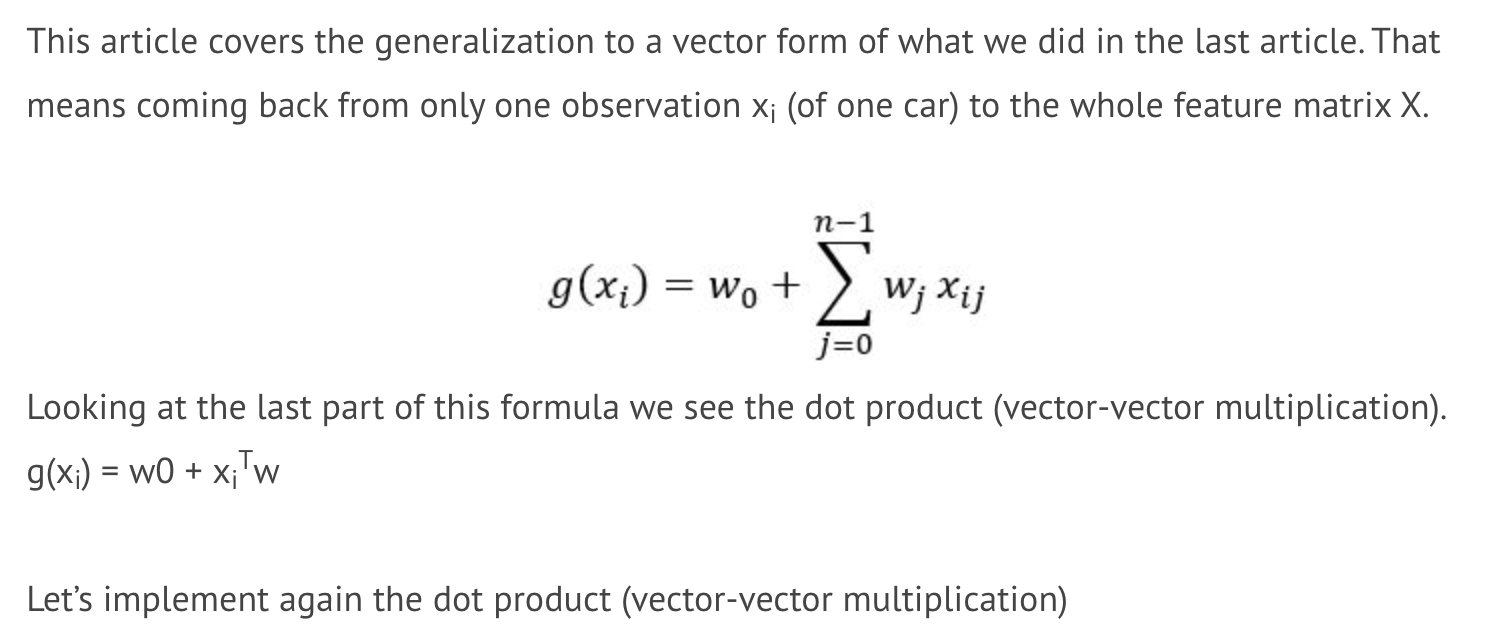

In [38]:
def dot(xi, w):
    n = len(xi)
     
    res = 0.0
    for j in range(n):
        res = res + xi[j] * w[j]
         
    return res

In [39]:
def linear_regression(xi):
    return w0 + dot(xi, w) 

In [40]:
xi = [138, 24, 1385]
w0 = 7.17
w = [0.01, 0.04, 0.002]
 
# adding w0 to the vector w
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [41]:
xi

[138, 24, 1385]

In [42]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)
 
linear_regression(xi)

12.280000000000001

In [43]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w
 
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]
 
# X becomes a list of lists
X = [x1, x2, x10]
X

[[1, 148, 24, 1385], [1, 132, 25, 2031], [1, 453, 11, 86]]

In [44]:
# This turns the list of lists into a matrix
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [45]:
# Now we have predictions, so for each car we have a price for this car
y = X.dot(w_new)
 
# shortcut to not do -1 manually to get the real $ price
np.expm1(y) 

array([237992.82334859, 768348.51018973, 222347.22211011])

In [46]:
def linear_regression(X):
    return X.dot(w_new)
 
y = linear_regression(X)
np.expm1(y) 

array([237992.82334859, 768348.51018973, 222347.22211011])

## Training a linear regression model
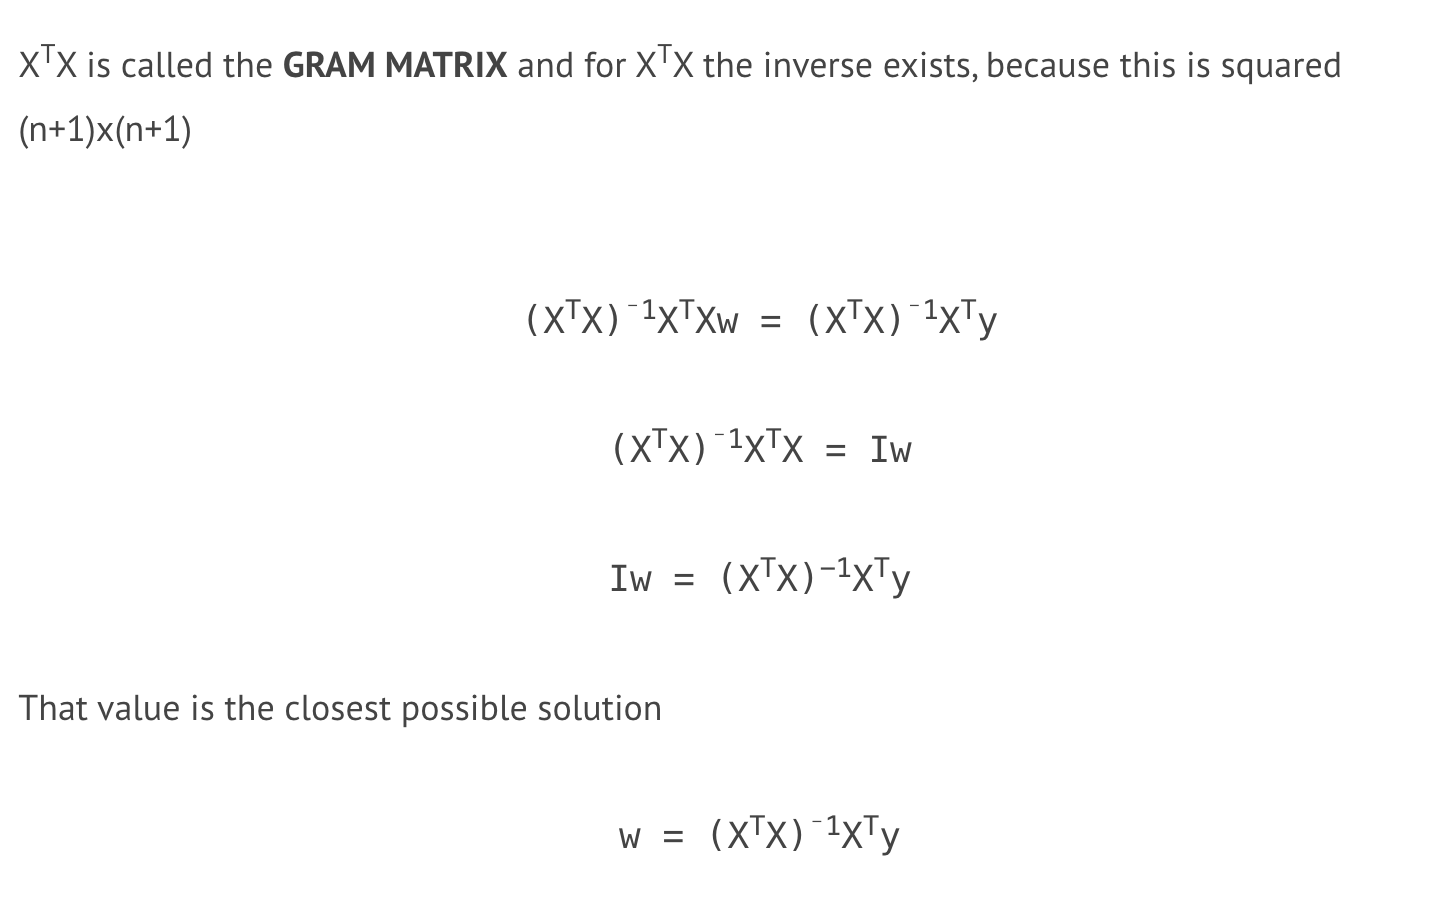

In [47]:
def train_linear_regression(X, y):
    pass

In [48]:
X =[
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 83],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],  
]
 
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   83],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

From the last article we know that we need to add a new column with ones to the feature matrix X. That is for the multiplication with w0. We remember that we can use np.ones() to get a vector with ones at each position.

In [49]:
ones = np.ones(9)
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [50]:
# X.shape[0] looks at the number of rows and creates the vector of ones
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Now we need to stack this vector of ones with our feature matrix X. For this we can use the NumPy function np.column_stack() as shown in the next snippet.

In [51]:
np.column_stack([ones, ones])

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [52]:
X = np.column_stack([ones, X])
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]
 
# GRAM MATRIX
XTX = X.T.dot(X)
 
# Inverse GRAM MATRIX
XTX_inv = np.linalg.inv(XTX)

In [53]:
# Without round(1) it's not exactly identity matrix but the other values 
# are very close to 0 --> we can treat them as 0 and take it as identity matrix
XTX.dot(XTX_inv)

array([[ 1.00000000e+00,  5.99169931e-18, -8.51606925e-18,
        -2.97308564e-19],
       [-1.08938076e-12,  1.00000000e+00,  1.29478693e-14,
        -1.42934269e-16],
       [-1.29348789e-13,  3.36596917e-16,  1.00000000e+00,
         7.08966577e-18],
       [-3.64836199e-13,  4.94565618e-15, -1.71792681e-15,
         1.00000000e+00]])

In [54]:
# This gives us the I matrix
XTX.dot(XTX_inv).round(1)

array([[ 1.,  0., -0., -0.],
       [-0.,  1.,  0., -0.],
       [-0.,  0.,  1.,  0.],
       [-0.,  0., -0.,  1.]])

In [55]:
# w_full contains all the weights
w_full = XTX_inv.dot(X.T).dot(y)
w_full

array([ 3.00092529e+04, -2.27839691e+01, -2.57690874e+02, -2.30322797e+00])

In [56]:
w0 = w_full[0]
w = w_full[1:]
w0, w

(30009.252922766642, array([ -22.78396914, -257.69087426,   -2.30322797]))

In [57]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
     
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
     
    return w_full[0], w_full[1:]

In [58]:
X =[
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 83],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],  
]
 
X = np.array(X)
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]
 
train_linear_regression(X, y)

(30009.252922766642, array([ -22.78396914, -257.69087426,   -2.30322797]))

## Car price baseline model

In [59]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [60]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [61]:
# We choose the columns engine_hp, engine_cylinders, highway_mpg, city_mpg, and popularity for our base model.
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
 
df_train[base].head()

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,63.0,4.0,38,31,5657
1,180.0,4.0,28,20,1385
2,219.0,6.0,29,18,1385
3,261.0,6.0,20,15,2009
4,402.0,8.0,26,17,617


In [62]:
X_train = df_train[base].values
X_train

array([[6.300e+01, 4.000e+00, 3.800e+01, 3.100e+01, 5.657e+03],
       [1.800e+02, 4.000e+00, 2.800e+01, 2.000e+01, 1.385e+03],
       [2.190e+02, 6.000e+00, 2.900e+01, 1.800e+01, 1.385e+03],
       ...,
       [2.950e+02, 8.000e+00, 1.700e+01, 1.300e+01, 5.490e+02],
       [1.180e+02, 4.000e+00, 3.100e+01, 2.300e+01, 5.860e+02],
       [4.200e+02, 8.000e+00, 2.200e+01, 1.500e+01, 1.624e+03]])

In [63]:
df_train[base].isnull().sum()
# Missing values are generally not good for our model. Therefore, you should always check whether such values are present.

engine_hp           38
engine_cylinders    21
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

As you can see there are two columns that have missing values. The easiest thing we can do is fill them with zeros. But notice filling it with 0 makes the model ignore this feature, because:

g(xi) = w0 + xi1w1 + xi2w2

if xi1 = 0 then the last equation simplifies to

g(xi) = w0 + 0 + xi2w2

But 0 is not always the best way to deal with missing values, because that means there is an observation of a car with 0 cylinders or 0 horse powers. And a car without cylinders or 0 horse powers does not make much sense at this point. For the current example this procedure is sufficient for us.

In [64]:
df_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [65]:
X_train = df_train[base].fillna(0).values
X_train

array([[6.300e+01, 4.000e+00, 3.800e+01, 3.100e+01, 5.657e+03],
       [1.800e+02, 4.000e+00, 2.800e+01, 2.000e+01, 1.385e+03],
       [2.190e+02, 6.000e+00, 2.900e+01, 1.800e+01, 1.385e+03],
       ...,
       [2.950e+02, 8.000e+00, 1.700e+01, 1.300e+01, 5.490e+02],
       [1.180e+02, 4.000e+00, 3.100e+01, 2.300e+01, 5.860e+02],
       [4.200e+02, 8.000e+00, 2.200e+01, 1.500e+01, 1.624e+03]])

In [66]:
y_train

array([ 7.60140233, 10.15700511,  9.91941011, ..., 10.42691346,
        7.60140233, 11.4636932 ])

In [67]:
w0, w = train_linear_regression(X_train, y_train)
w0, w

(7.984356909826076,
 array([ 9.57533827e-03, -1.58464326e-01,  1.62629808e-02,  1.20295779e-02,
        -2.13808857e-05]))

In [68]:
y_pred = w0 + X_train.dot(w)
y_pred

array([ 8.82370443,  9.74040299,  9.78911635, ...,  9.96248417,
        9.24869302, 11.24179106])

In [69]:
# alpha changes the transparency of the bars
# bins specifies the number of bars
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

# Validating the model 
## Root Mean Squared Error – RMSE
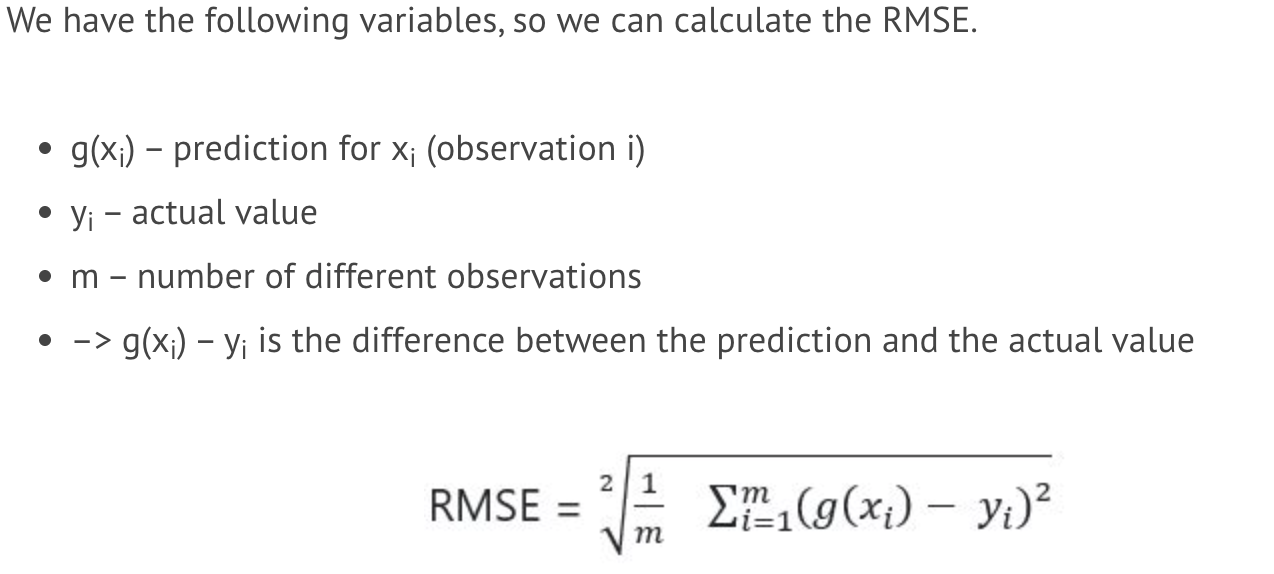

In [70]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [71]:
rmse(y_train, y_pred)

0.7533413830553982

## Validating the model

In [72]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
 
X_train = df_train[base].fillna(0).values
 
w0, w = train_linear_regression(X_train, y_train)
 
y_pred = w0 + X_train.dot(w)

In [73]:
# provide the same way of preparing the dataset regardless of whether it’s train set, validation set, or test set.
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X

In [74]:
# Training part:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
 
# Validation part:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
# Evaluation part:
rmse(y_val, y_pred)

0.742420121334551

When we compare the RMSE from training with the value from validation (0.746 vs. 0.733) we see that the model performs similarly well on the seen and unseen data. That is what we have hoped for.

# Feature Engineering 

In [75]:
df_train.year.max()

2017

In [76]:
2017 - df_train.year #how many year the car used 

0       22
1        4
2        9
3        4
4        2
        ..
7145     1
7146    11
7147    10
7148    22
7149     0
Name: year, Length: 7150, dtype: int64

In [77]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X

In [78]:
X_train = prepare_X(df_train)

In [79]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [80]:
X_train

array([[6.300e+01, 4.000e+00, 3.800e+01, 3.100e+01, 5.657e+03, 2.200e+01],
       [1.800e+02, 4.000e+00, 2.800e+01, 2.000e+01, 1.385e+03, 4.000e+00],
       [2.190e+02, 6.000e+00, 2.900e+01, 1.800e+01, 1.385e+03, 9.000e+00],
       ...,
       [2.950e+02, 8.000e+00, 1.700e+01, 1.300e+01, 5.490e+02, 1.000e+01],
       [1.180e+02, 4.000e+00, 3.100e+01, 2.300e+01, 5.860e+02, 2.200e+01],
       [4.200e+02, 8.000e+00, 2.200e+01, 1.500e+01, 1.624e+03, 0.000e+00]])

In [81]:
# Training part:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
 
# Validation part:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
# Evaluation part:
rmse(y_val, y_pred)

0.5104508593565901

## Categorical variables

In [82]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [83]:
df_train.number_of_doors

0       2.0
1       4.0
2       4.0
3       4.0
4       2.0
       ... 
7145    2.0
7146    4.0
7147    4.0
7148    2.0
7149    4.0
Name: number_of_doors, Length: 7150, dtype: float64

In [84]:
df_train.number_of_doors == 2

0        True
1       False
2       False
3       False
4        True
        ...  
7145     True
7146    False
7147    False
7148     True
7149    False
Name: number_of_doors, Length: 7150, dtype: bool

In [85]:
# one-hot encoding
df_train['num_doors_2'] = (df_train.number_of_doors == 2).astype('int')
df_train['num_doors_3'] = (df_train.number_of_doors == 3).astype('int')
df_train['num_doors_4'] = (df_train.number_of_doors == 4).astype('int')

In [86]:
'num_doors_%s' % 4

'num_doors_4'

In [87]:
# With that replacement we can write a loop
for v in [2, 3, 4]:
    df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype('int')

In [88]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,ford,aspire,1995,regular_unleaded,63.0,4.0,manual,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,38,31,5657,1,0,0
1,chevrolet,captiva_sport,2013,flex-fuel_(unleaded/e85),180.0,4.0,automatic,front_wheel_drive,4.0,"crossover,flex_fuel",midsize,4dr_suv,28,20,1385,0,0,1
2,chevrolet,malibu_classic,2008,regular_unleaded,219.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,29,18,1385,0,0,1
3,nissan,xterra,2013,regular_unleaded,261.0,6.0,automatic,four_wheel_drive,4.0,NaN,midsize,4dr_suv,20,15,2009,0,0,1
4,mercedes-benz,e-class,2015,premium_unleaded_(required),402.0,8.0,automatic,rear_wheel_drive,2.0,"luxury,high-performance",midsize,convertible,26,17,617,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,chevrolet,corvette,2016,premium_unleaded_(recommended),460.0,8.0,manual,rear_wheel_drive,2.0,high-performance,compact,coupe,29,17,1385,1,0,0
7146,buick,rendezvous,2006,regular_unleaded,195.0,6.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,21,16,155,0,0,1
7147,gmc,sierra_1500_classic,2007,flex-fuel_(unleaded/e85),295.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,17,13,549,0,0,1
7148,mazda,mx-6,1995,regular_unleaded,118.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,31,23,586,1,0,0


In [89]:
# We delete this because we'll use another solution
for v in [2, 3, 4]:
    del df_train['num_doors_%s' % v]

In [90]:
# Let’s use this string replacement method in our prepare_X function.
def prepare_X(df):
    df = df.copy()
    features = base.copy()
     
    df['age'] = 2017 - df.year
    features.append('age')
     
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
     
    df_num = df[features]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X
 
prepare_X(df_train)

array([[ 63.,   4.,  38., ...,   1.,   0.,   0.],
       [180.,   4.,  28., ...,   0.,   0.,   1.],
       [219.,   6.,  29., ...,   0.,   0.,   1.],
       ...,
       [295.,   8.,  17., ...,   0.,   0.,   1.],
       [118.,   4.,  31., ...,   1.,   0.,   0.],
       [420.,   8.,  22., ...,   0.,   0.,   1.]])

In [91]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)

0.5091988628829993

We see in contrast to the last training with rmse of 0.521287384381091 there is decreased almost negligible so the number of doors feature is not that useful. Maybe the ‘Make’ information is more useful.

In [92]:
df.make.nunique() 

48

In [93]:
df.make

0            bmw
1            bmw
2            bmw
3            bmw
4            bmw
          ...   
11909      acura
11910      acura
11911      acura
11912      acura
11913    lincoln
Name: make, Length: 11914, dtype: object

In [94]:
df.make.value_counts().head()

make
chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: count, dtype: int64

In [95]:
# If we want to get the actual values, we use the index property
df.make.value_counts().head().index

Index(['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'], dtype='object', name='make')

In [96]:
# Wrap it in a usual Python list
makes = list(df.make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [97]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
     
    df['age'] = 2017 - df.year
    features.append('age')
     
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
         
    for v in makes:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append('make_%s' % v)
     
    df_num = df[features]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X

In [98]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)

0.5013482049920087

The model performance has once again improved somewhat. How about adding all the other categorical variables now? This should improve the performance even more, right? Let’s try.

In [99]:
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 
    'market_category', 'vehicle_size', 'vehicle_style'
]
 
# The dictionary category will contain for each of the categories 
# the top 5 most common ones
categories = {}
 
for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)
     
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

The next snippet shows how to implement the new features to our prepare_X function. This time we need two loops as described inline.

In [100]:
def prepare_X(df):
    # this is good way to do, otherwise while using df you'll modify the original data
    # what is mostly not wanted
    df = df.copy()
    features = base.copy()
     
    df['age'] = 2017 - df.year
    features.append('age')
     
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
 
    # First loop is for each key of the dictionary categories.
    # Second loop is for each value inside the categories
    # For each of this values we create a new column.
    for c, values in categories.items():    
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))
     
    df_num = df[features]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X

In [101]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)

80.2076984227542

This time the model performance is very bad. As you can see the RMSE is very large. So something went wrong. In the next article we’ll see why that has happened and how to fix it.

# Regularization
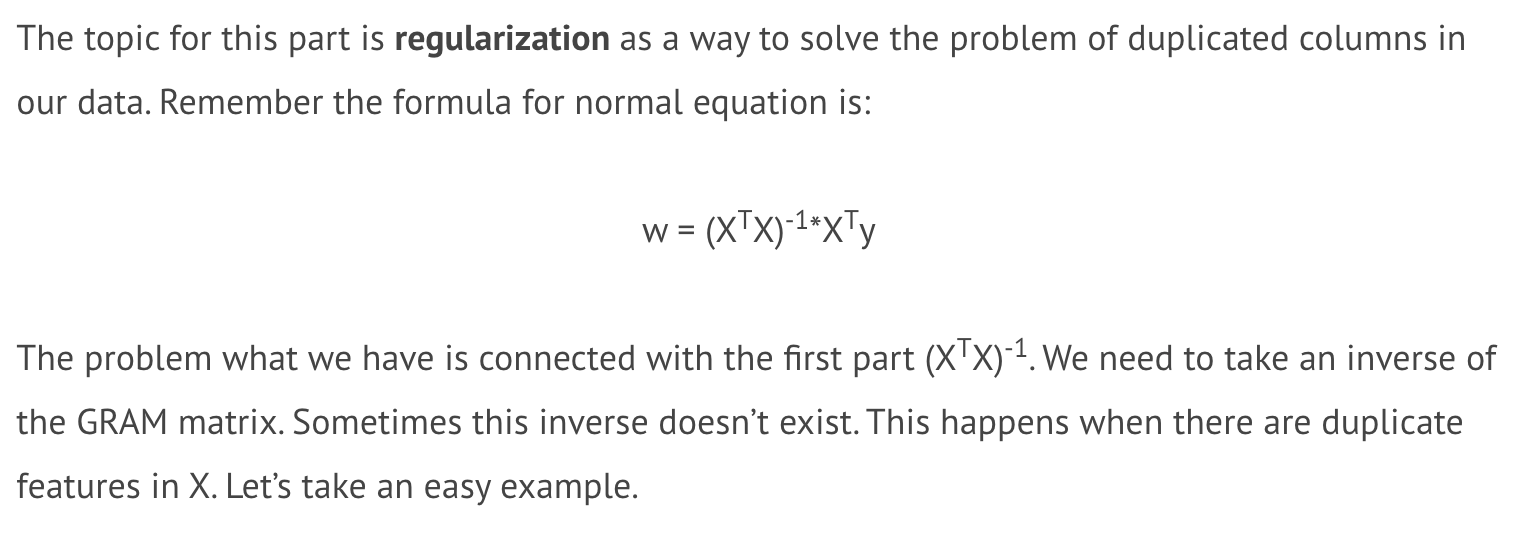

In [102]:
# You see here 2nd and 3rd columns are identical
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5]
]

In [103]:
X = np.array(X)
X

array([[4, 4, 4],
       [3, 5, 5],
       [5, 1, 1],
       [5, 4, 4],
       [7, 5, 5],
       [4, 5, 5]])

In [104]:
XTX = X.T.dot(X)
XTX

array([[140, 111, 111],
       [111, 108, 108],
       [111, 108, 108]])

The output of the last snippet shows the XTX matrix. You see the 2nd and 3rd columns are the same. In this case the inverse doesn’t exist.
Remember: In linear algebra we say that one column is a linear combination of other columns. That means it’s possible to express the column number 3 with other columns of the matrix which is basically just a duplicate of column 2.
Therefore the next code snipped raises an error “Singular matrix”.

In [105]:
np.linalg.inv(XTX)

LinAlgError: Singular matrix

The code from the last article didn’t raise that error, so the inverse of that gram matrix exists. But the reason for the very big value for rmse is that our data is not very clean.

Let’s go back to our last example but this time similar X as before with a few noise.

In [107]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.0000001],
]
 
X = np.array(X)
y = [1, 2, 3, 1, 2, 3]
 
XTX = X.T.dot(X)
XTX

array([[140.       , 111.       , 111.0000004],
       [111.       , 108.       , 108.0000005],
       [111.0000004, 108.0000005, 108.000001 ]])

In [108]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.97824749e-02, -2.72451021e+05,  2.72450986e+05],
       [-2.72451035e+05,  6.19992148e+13, -6.19992143e+13],
       [ 2.72450992e+05, -6.19992143e+13,  6.19992137e+13]])

As we can see from this example, a little noise is enough to make the two columns no longer identical. This leads to the fact that the calculation of the gram matrix no longer throws an error. Now we can calculate vector w again.

In [109]:
w = XTX_inv.dot(X.T).dot(y)
w

array([ 6.66696744e-01, -7.77260659e+06,  7.77260614e+06])

The first element (that’s the unique feature) of w looks ok, but the second and the third elements (that are the duplicates with noise) are very big numbers. That’s why we have duplicates in our feature matrix. The noise leads to the fact that no more error is thrown. Nevertheless, the model performs poorly due to the duplicates. What we can do to fix the problem is to add a small number (called alpha) to the diagonal of XTX. Let’s demonstrate this on an easier example of XTX.

In [106]:
# Adding a small number to the diagonal
# helps to control. So the numbers of w become smaller
XTX = [
    [1.0001, 2, 2],
    [2, 1.0001, 1.0000001],
    [2, 1.0000001, 1.0001]
]
 
XTX = np.array(XTX)
np.linalg.inv(XTX)

array([[-3.33366691e-01,  3.33350007e-01,  3.33350007e-01],
       [ 3.33350007e-01,  5.00492166e+03, -5.00508835e+03],
       [ 3.33350007e-01, -5.00508835e+03,  5.00492166e+03]])

Remember there was the eye function to get an Identity matrix. Maybe we can use this…

In [110]:
np.eye(3)
 
# When adding XTX to this matrix, it adds one on the diagonal
XTX + np.eye(3)
 
# We can multiply this eye by a smal number
XTX = XTX + 0.01*np.eye(3)
XTX

array([[140.01     , 111.       , 111.0000004],
       [111.       , 108.01     , 108.0000005],
       [111.0000004, 108.0000005, 108.010001 ]])

In [111]:
np.linalg.inv(XTX)

array([[ 3.85624710e-02, -1.98161275e-02, -1.98156884e-02],
       [-1.98161275e-02,  5.00124979e+01, -4.99875026e+01],
       [-1.98156884e-02, -4.99875026e+01,  5.00124970e+01]])

Solving this problem is called regularization and means in this case controlling. We’re controlling the weights that they don’t grow too much. Alpha = 0.01 is a parameter, and the larger this parameter the larger the numbers on the diagonal. And the larger this numbers on the diagonal the smaller the values in the inverse XTX matrix.

This leads us to reimplementing the train_linear_regression function again.

In [112]:
# reg = regularized
# parameter r = short for regularization
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
     
    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
     
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
     
    return w_full[0], w_full[1:]

In [113]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)

0.45667900408216433

# Tuning the model

In [114]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
 
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
 
    score = rmse(y_val, y_pred)
     
    print("reg parameter: ",r, "bias term: ",w0, "rmse: ",score)

reg parameter:  0.0 bias term:  1.7782399647022972e+16 rmse:  80.2076984227542
reg parameter:  1e-05 bias term:  10.286071020160689 rmse:  0.4566803799564658
reg parameter:  0.0001 bias term:  6.285575519468678 rmse:  0.4566804024467104
reg parameter:  0.001 bias term:  6.265935878743052 rmse:  0.45668025987059824
reg parameter:  0.01 bias term:  6.253688860471564 rmse:  0.45667900408216433
reg parameter:  0.1 bias term:  6.142370697608378 rmse:  0.4566827027278171
reg parameter:  1 bias term:  5.513624466046643 rmse:  0.45727054646709236
reg parameter:  10 bias term:  4.238712103402121 rmse:  0.46800905831969325


In [115]:
r = 0.01
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
score = rmse(y_val, y_pred)
    
print("rmse: ",score)

rmse:  0.45667900408216433


# Using the model
What we want to do now is to train our final model on both training dataset and validation dataset. We call this FULL TRAIN. After that we make the final evaluation on the test dataset to make sure that our model works fine and check what is the value for RMSE. It shouldn’t be too different from what we saw on the validation dataset.

## Combining datasets
First step to do is getting our data. So we need to combine df_train and df_val into one dataset. We can use Pandas concat() function that takes a list of dataframes and concatenates them together.

df_full_train = pd.concat([df_train, df_val])

We also need to concatenate y_train and y_val to get y_full_train. This time we use the concatenate function of NumPy library.

In [118]:
df_full_train = pd.concat([df_train, df_val])

In [116]:
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([ 7.60140233, 10.15700511,  9.91941011, ..., 10.40716771,
       10.49711822, 10.11459901])

When combining two dataframes it can happen that the index is not sequential. Here you can use an already known function and reset the index.

In [119]:
df_full_train = df_full_train.reset_index(drop=True)

In [120]:
X_full_train = prepare_X(df_full_train) 
X_full_train

array([[ 63.,   4.,  38., ...,   0.,   0.,   0.],
       [180.,   4.,  28., ...,   0.,   0.,   0.],
       [219.,   6.,  29., ...,   0.,   0.,   0.],
       ...,
       [290.,   6.,  24., ...,   0.,   0.,   0.],
       [260.,   6.,  27., ...,   0.,   0.,   0.],
       [200.,   4.,  30., ...,   1.,   0.,   0.]])

## Train the final model

In [121]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.01)
w0, w

(6.2621260939537375,
 array([ 1.63298957e-03,  1.15131749e-01, -6.90825896e-03, -5.90311068e-03,
        -5.28277943e-05, -9.62814772e-02, -6.34473039e-01, -8.00236828e-01,
        -4.88512015e-01, -2.84995449e-02,  1.96917536e-01, -4.34586787e-04,
        -9.78298496e-02, -1.02836559e-01, -4.73497836e-01,  7.72159251e-02,
        -3.17046575e-01, -5.58820349e-01, -8.71543908e-02,  1.05766997e+00,
         8.71921585e-01,  1.13107255e+00,  2.69943459e+00,  5.02038502e-01,
         1.62539838e+00,  1.50932411e+00,  1.60899352e+00,  1.51841579e+00,
        -7.94344955e-02,  4.73177396e-02, -4.32483416e-02, -1.07684414e-02,
         4.91267469e-03,  2.17211596e+00,  2.04644034e+00,  2.04357234e+00,
        -5.28956281e-02,  3.96414027e-02,  1.58700850e-01,  3.04936589e-01,
        -1.55564971e-01]))

## Applying model to test data

In [122]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
 
score = rmse(y_test, y_pred)
    
print("rmse: ",score)

rmse:  0.4590951907913183


RMSE_test is not so far away from RMSE_val. That means the model generalizes quite well and it didn’t get this score by chance. Now we have our final model and we can use it. The way we want to use it is to predict the price of an (unseen) car – unseen means here that the model hasn’t seen this car during training.

## Using the model
Using the model means:

Extracting all the features (getting feature vector of the car)
Applying our final model to this feature vector & predicting the price

Feature Extraction - 
For this step we can take any car from our test dataset and pretend it’s a new car. Let’s just take one car.

In [123]:
df_test.iloc[20]

make                        volkswagen
model                            jetta
year                              2015
engine_fuel_type      regular_unleaded
engine_hp                        115.0
engine_cylinders                   4.0
transmission_type            automatic
driven_wheels        front_wheel_drive
number_of_doors                    4.0
market_category                    NaN
vehicle_size                   midsize
vehicle_style                    sedan
highway_mpg                         34
city_mpg                            23
popularity                         873
Name: 20, dtype: object

Usually the way we do it is that we don’t get a dataframe here. But it could be a Python dictionary with all the information about the car. In real life you can imagine a website or an app, where people enter all the values. Then the website sends the request with all the information (as dictionary) to the model. The model replies back with the predicted price.

For this example we turn this data of our car into a dictionary.

In [124]:
car = df_test.iloc[20].to_dict()
car

{'make': 'volkswagen',
 'model': 'jetta',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 115.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'midsize',
 'vehicle_style': 'sedan',
 'highway_mpg': 34,
 'city_mpg': 23,
 'popularity': 873}

The car is our request and now remember the prepare_X function expects a dataframe, so we need to create a dataframe with a single row for our request.

In [125]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,volkswagen,jetta,2015,regular_unleaded,115.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,34,23,873


In [126]:
X_small = prepare_X(df_small)
X_small

array([[115.,   4.,  34.,  23., 873.,   2.,   0.,   0.,   1.,   0.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.]])

In [127]:
y_pred = w0 + X_small.dot(w)
# Don't need an array but it's first (and only) item
y_pred = y_pred[0]
y_pred 

10.015281543633757

In [128]:
# not the price in $. To get the real price we need to undo the logarithm.
np.expm1(y_pred)

22364.649215427253

In [129]:
np.expm1(y_test[20])

19420.0